Found 9428 images belonging to 2 classes.
Found 2357 images belonging to 2 classes.
Class indices: {'invalid_radiology_images': 0, 'valid_radiology_images': 1}
Class weights: {0: 1.473125, 1: 0.7569043031470777}


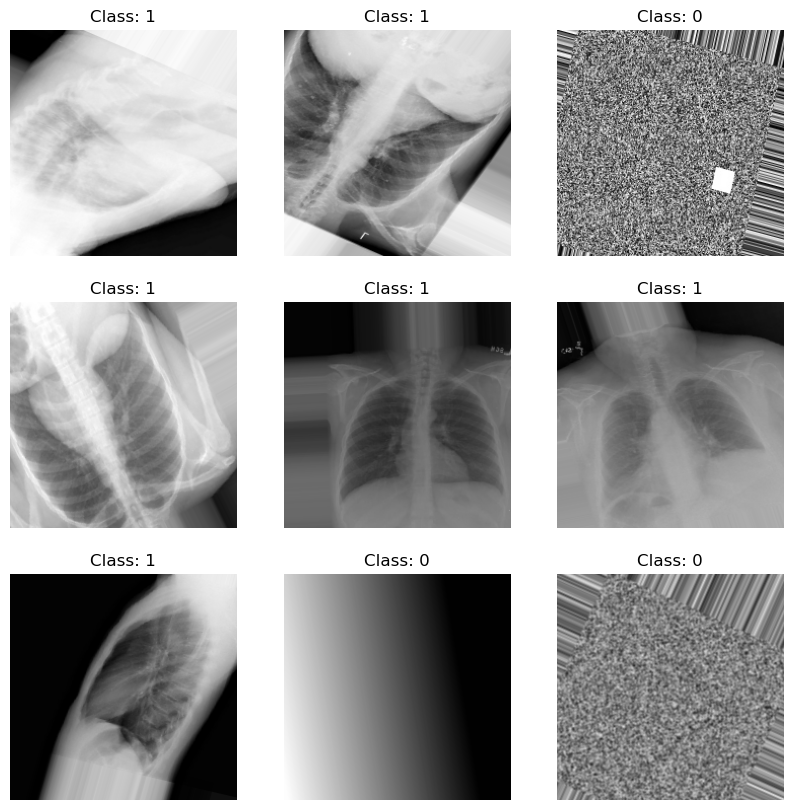

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 1393s 5s/step - accuracy: 0.7219 - loss: 1.6080 - val_accuracy: 0.8774 - val_loss: 0.5366
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 751s 3s/step - accuracy: 0.8682 - loss: 0.5437 - val_accuracy: 0.8999 - val_loss: 0.4228
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.8857 - loss: 0.4428 - val_accuracy: 0.9096 - val_loss: 0.3866
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.8957 - loss: 0.4030 - val_accuracy: 0.9228 - val_loss: 0.3417
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 759s 3s/step - accuracy: 0.9055 - loss: 0.3909 - val_accuracy: 0.9368 - val_loss: 0.3133
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 702s 2s/step - accuracy: 0.9093 - loss: 0.3601 - val_accuracy: 0.9508 - val_loss: 0.3205
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 741s 3s/step - accuracy: 0.9058 - loss: 0.3801 - val_accuracy: 0.9275 - val_loss: 0.3108
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 760s 3s/step - accuracy: 0.9102 - loss: 0.3554 - val_acc

74/74 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9618 - loss: 0.2475
Validation Loss: 0.2883281707763672
Validation Accuracy: 0.9380568265914917
74/74 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step
              precision    recall  f1-score   support

     Invalid       0.88      0.99      0.93       800
       Valid       0.99      0.93      0.96      1557

    accuracy                           0.95      2357
   macro avg       0.94      0.96      0.95      2357
weighted avg       0.95      0.95      0.95      2357



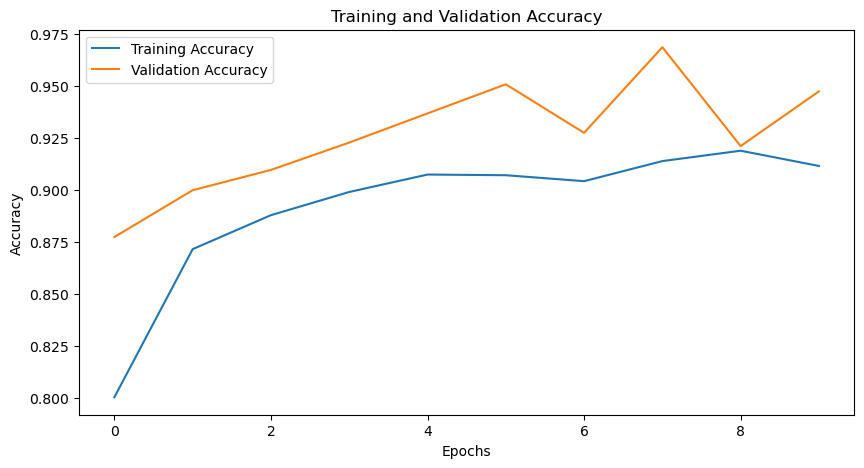

Text(0, 0.5, 'Loss')

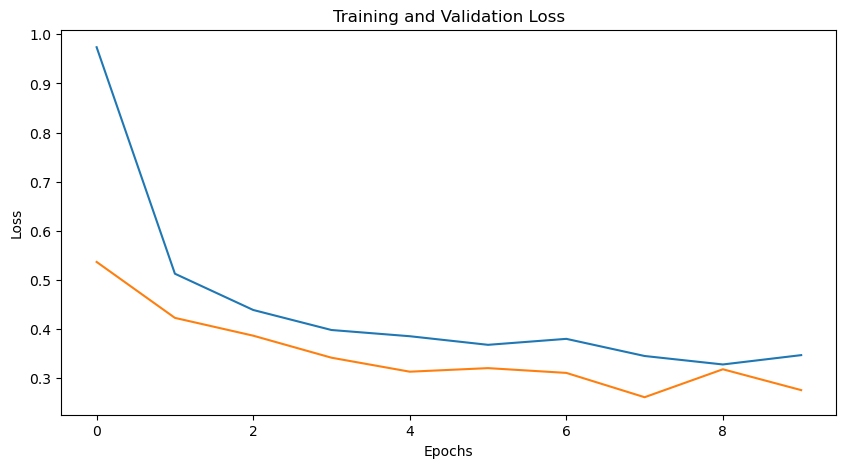

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Path to the dataset
data_dir = "/Users/shrouqgaber/Downloads/radiology-images"
 # Update this to your dataset's location

# Define image size and batch size
img_size = (224, 224)  # Resize images to 224x224 pixels
batch_size = 32  # Number of images per batch
validation_split = 0.2  # Percentage of data to use for validation (e.g., 20%)

# Data augmentation and automatic splitting
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Horizontally flip
    vertical_flip=True,  # Vertically flip
    validation_split=validation_split,  # Automatically create train/validation splits
)

# Load training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # Binary classification: valid vs invalid
    subset="training",  # Use the training split
    shuffle=True,
)

# Load validation data
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",  # Use the validation split
    shuffle=False,  # Do not shuffle for validation set
)

# Check class distribution
print(f"Class indices: {train_generator.class_indices}")
class_counts = train_generator.classes
class_weights = {
    0: len(class_counts) / (2 * np.sum(class_counts == 0)),
    1: len(class_counts) / (2 * np.sum(class_counts == 1)),
}
print(f"Class weights: {class_weights}")

# Visualize a batch of training images
x, y = next(train_generator)  # Correct method to fetch the next batch
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x[i])
    plt.title(f"Class: {int(y[i])}")
    plt.axis("off")
plt.show()

# Build the CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", kernel_regularizer=l2(0.01), input_shape=(img_size[0], img_size[1], 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.01)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2(0.01)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),  # Increased dropout to prevent overfitting
        Dense(1, activation="sigmoid"),  # Output layer for binary classification
    ]
)

# Compile the model
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy",  # Binary classification loss
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs based on your dataset
    validation_data=val_generator,
    class_weight=class_weights,  # Handle class imbalance
)

# Save the model
model.save("fixed_radiology_image_classifier.h5")

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Generate predictions
y_pred = model.predict(val_generator)
y_pred = (y_pred > 0.5).astype(int)
y_true = val_generator.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=["Invalid", "Valid"]))

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Directory contents: ['.DS_Store', 'valid_radiology_images', 'invalid_radiology_images']

Checking subdirectories...
Found 11785 images in subdirectories


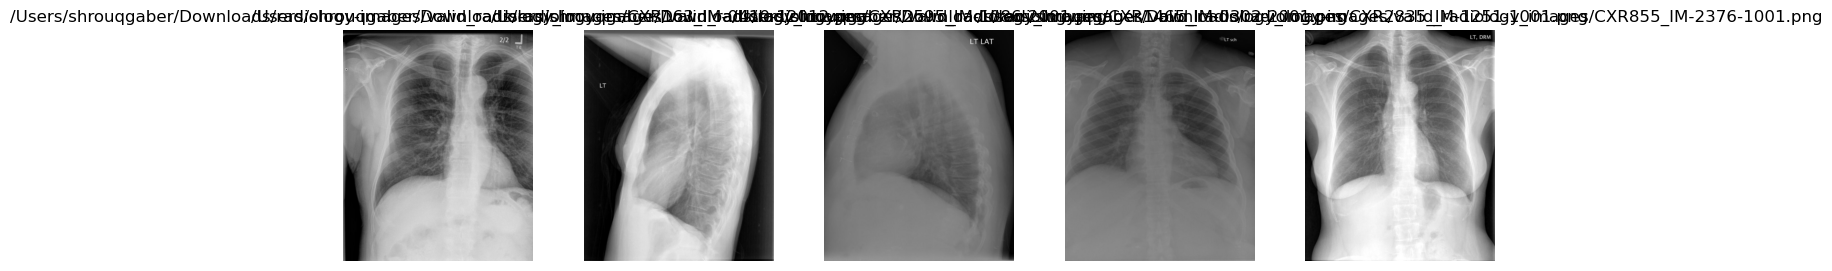

In [33]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 1. Verify the directory exists
image_dir = '/Users/shrouqgaber/Downloads/radiology-images'
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"Directory not found: {image_dir}")

# 2. List ALL contents for debugging
print("Directory contents:", os.listdir(image_dir))

# 3. Get image files with more inclusive criteria
image_extensions = ('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif', '.dcm', '.DCM')
image_files = [f for f in os.listdir(image_dir) 
              if f.lower().endswith(image_extensions) and not f.startswith('.')]

# 4. If still no files, check subdirectories
if not image_files:
    print("\nChecking subdirectories...")
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_files.append(os.path.join(root, file))
    
    if not image_files:
        raise ValueError(f"No valid images found in {image_dir} or its subdirectories")
    else:
        print(f"Found {len(image_files)} images in subdirectories")

# 5. Display images with proper syntax
if image_files:
    fig, axes = plt.subplots(1, min(5, len(image_files)), figsize=(15, 3))
    
    for i, img_file in enumerate(image_files[:5]):
        img_path = os.path.join(image_dir, img_file) if not os.path.isabs(img_file) else img_file
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)  # Fixed: 'imshow' not 'inshow'
            axes[i].set_title(img_file)  # Fixed: 'set_title' not 'set.title'
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading {img_file}: {e}")  # Fixed string formatting
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


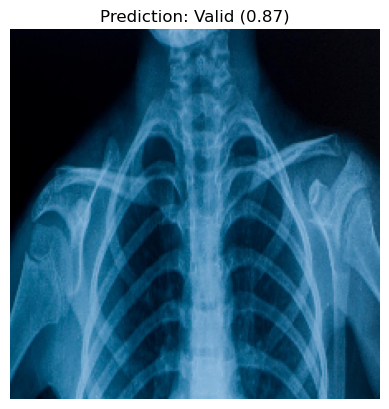

Predicted class: Valid
Confidence: 0.87


In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(model, img_path, img_size=(224, 224)):
    """
    Predict whether a single image is valid or invalid
    
    Args:
        model: Your trained Keras model
        img_path: Path to the image file
        img_size: Target size (must match training size)
    
    Returns:
        Prediction (0 for invalid, 1 for valid) and confidence score
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize like training data
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]
    class_idx = 1 if confidence > 0.5 else 0
    
    # Display the image with prediction
    plt.imshow(img)
    plt.title(f"Prediction: {'Valid' if class_idx == 1 else 'Invalid'} ({confidence:.2f})")
    plt.axis('off')
    plt.show()
    
    return class_idx, confidence

# Now load your model and make predictions
model = tf.keras.models.load_model("fixed_radiology_image_classifier.h5")
image_path = "/Users/shrouqgaber/Downloads/radiology-utsw-banner-1600x732.jpg"
class_idx, confidence = predict_image(model, image_path)

print(f"Predicted class: {'Valid' if class_idx == 1 else 'Invalid'}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


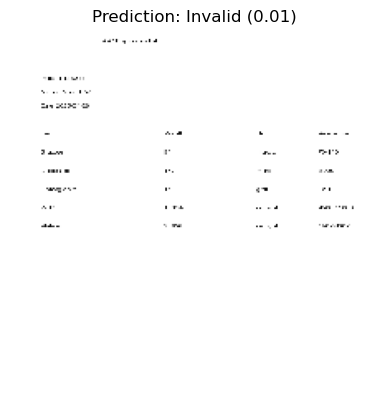

Predicted class: Invalid
Confidence: 0.01


In [52]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(model, img_path, img_size=(224, 224)):
    """
    Predict whether a single image is valid or invalid
    
    Args:
        model: Your trained Keras model
        img_path: Path to the image file
        img_size: Target size (must match training size)
    
    Returns:
        Prediction (0 for invalid, 1 for valid) and confidence score
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize like training data
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]
    class_idx = 1 if confidence > 0.5 else 0
    
    # Display the image with prediction
    plt.imshow(img)
    plt.title(f"Prediction: {'Valid' if class_idx == 1 else 'Invalid'} ({confidence:.2f})")
    plt.axis('off')
    plt.show()
    
    return class_idx, confidence

# Now load your model and make predictions
model = tf.keras.models.load_model("fixed_radiology_image_classifier.h5")
image_path = "/Users/shrouqgaber/Downloads/10178.png"
class_idx, confidence = predict_image(model, image_path)

print(f"Predicted class: {'Valid' if class_idx == 1 else 'Invalid'}")
print(f"Confidence: {confidence:.2f}")